In [1]:
import os
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import datetime

In [2]:
# Load Data
#datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', 'time_series_covid19_confirmed_global.csv')   
raw = pd.read_csv(datapath)
del raw['Lat']
del raw['Long']
raw= raw.replace('Mainland China','China')
raw

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,NaN,Angola,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,485,499,499,513,513,514,611,632,639,659
262,NaN,Yemen,0,0,0,0,0,0,0,0,...,453,469,482,484,496,524,560,591,632,705
263,NaN,Comoros,0,0,0,0,0,0,0,0,...,132,132,141,141,141,141,162,162,163,176
264,NaN,Tajikistan,0,0,0,0,0,0,0,0,...,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971


In [3]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>200)]

df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
Albania,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
Algeria,0,0,0,0,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
Argentina,0,0,0,0,0,0,0,0,0,0,...,20197,21037,22020,22794,23620,24761,25987,27373,28764,30295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,328,328,329,331,332,332,332,332,333,334
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,464,464,464,472,473,481,485,487,489,489
Yemen,0,0,0,0,0,0,0,0,0,0,...,453,469,482,484,496,524,560,591,632,705


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Lithuania'

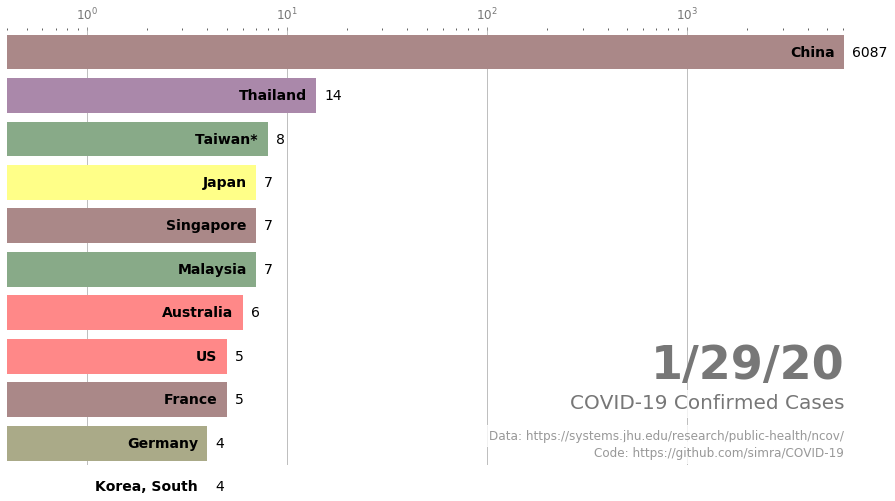

In [4]:

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from math import log10
import numpy as np

print([f for f in df.index])

#palette = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
#     '#aafbff', '#f7bb5f', '#eafb50']
palette = ['#aa8888', '#88aa88', '#aa8888', '#aaaa88',
     '#aa88aa', '#88aaaa', '#ff8888', '#88ff88', '#ff8888', '#ffff88',
     '#ff88ff', '#88ffff' ]

colors = dict(zip(
    df.index,
    palette*ceil(len(df.index)/len(palette))))
print(colors['Turkey'])
fig, ax = plt.subplots(figsize=(15, 8))

# TODO: add a frame for the last day
def plot_barchart(date_tuple):
    (current_date,next_date,increment)=date_tuple
    
    dff = (df[current_date]
           .sort_values(ascending=False)
           .head(10))
    dff = dff[::-1]   
    
    dfnext = (df[next_date]
           .sort_values(ascending=True))
    
    start_countries = set(dff.index)
    end_countries = set(dfnext.index[len(dfnext)-10:])
    add_countries = end_countries.difference(start_countries)
    #print(len(end_countries),add_countries)
    dff=pd.concat([dfnext[dfnext.index.isin(add_countries)],dff])
    
    # dff ordered from lowest to largest.
    start_pos = dict([(c,i+10-len(dff.index)) for i,c in enumerate(dff.index)])
    start_vals = dict(zip(dff.index,dff))
    # dfnext ordered from lowest to largest too. Last element should have i=9
    end_pos = dict([(c,i+10-len(dfnext.index)) for i,c in enumerate(dfnext.index)])
    end_vals = dict(zip(dfnext.index,dfnext))
    
    x=[(1-increment)*start_pos[c]+increment*(end_pos[c]) for c in dff.index]
    y=[int((1-increment)*start_vals[c]+increment*end_vals[c]) for c in dff.index ]
    #print(x)
    #dff.plot(kind='barh',ax=ax)
    ax.clear()
    ax.barh(x, y, color=[colors[k] for k in dff.index])
    
    #dx = log10(dff.max())*10# 200 # TODO
    #dx = 0
    
    for i, name in enumerate(dff.index):
        ax.text(0.9*y[i], x[i],     name,    size=14, weight=600,        ha='right', va='center')  
        ax.text(1.1*y[i], x[i],     y[i],      size=14,      ha='left', va='center') 
    # Add year right middle portion of canvas
    ax.text(1, 0.2, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(1, 0.13, 'COVID-19 Confirmed Cases', transform=ax.transAxes, ha='right', size=20,
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, 0.06, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=12,
            color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=12,
            color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.set_xscale('log')
    plt.xlim(min(y)/10,max(y))
    plt.ylim(-0.5,len(start_countries)-0.5)
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.set_yticks([])
    plt.box(False)
    
test = False
if test:
    plot_barchart((df.columns[-1],df.columns[-2],0.4))
else:
    r = np.linspace(0,1,5,endpoint=False)
    #print(r)
    frames = [(df.columns[i],df.columns[i+1],j)  for i in range(7,len(df.columns)-1) for j in r ] + [(df.columns[-1],df.columns[-1],0)]
    #print(frames)
    animator = animation.FuncAnimation(fig, plot_barchart, frames=frames)
    #HTML(animator.to_jshtml()) 
    maxDate=datetime.datetime.strptime(df.columns[-1],'%m/%d/%y')
    #savedir = os.path.join('data',maxDate.strftime('%Y%m%d'))
    savedir='data'
    if not os.path.isdir(savedir):
        os.makedirs(savedir)
    animator.save(os.path.join(savedir,'animation.gif'))